In [37]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly_express as px

In [38]:
#Load Excel Data
df = pd.read_excel(r"C:\Users\talal\Downloads\E Commerce Dataset.xlsx", sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [40]:
print(df.isna().sum())
print('-----------------------------------')
print('Number of unique values', df['CustomerID'].count())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64
-----------------------------------
Number of unique values 5630


In [41]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [42]:
# Select Numeric Columns
num_columns = df.select_dtypes(include=['int64', 'float64'])
num_columns

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,1,13.0,3.0,5,5,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90


In [43]:
# Fill numeric NaNs with median
for col in num_columns:
    df[col] = num_columns[col].fillna(num_columns[col].median())

In [44]:
# Count Login Device Frequency
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [45]:
# Replace Phone with Mobile Phone in Preferred Login Device Column
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Phone': 'Mobile Phone'})

In [46]:
# Count Login Device Frequency After Replcae Phone with Mobile Phone
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [47]:
# Count Payments Mode Frequency
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [48]:
# Replace CC with Credit Card in Preferred Payment Mode Column
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})

In [49]:
# Count Payment Mode Frequency After Replcae CC with Credit Card
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [50]:
# Count Orders Category Frequency
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [16]:
# Replace Mobile with Mobile Phone in Preferred Orders Category Column
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile': 'Mobile Phone'})

In [51]:
# Count Orders Category Frequency After Replcae Mobile with Mobile Phone
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [52]:
# Count Churn Frequency 
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

<Axes: >

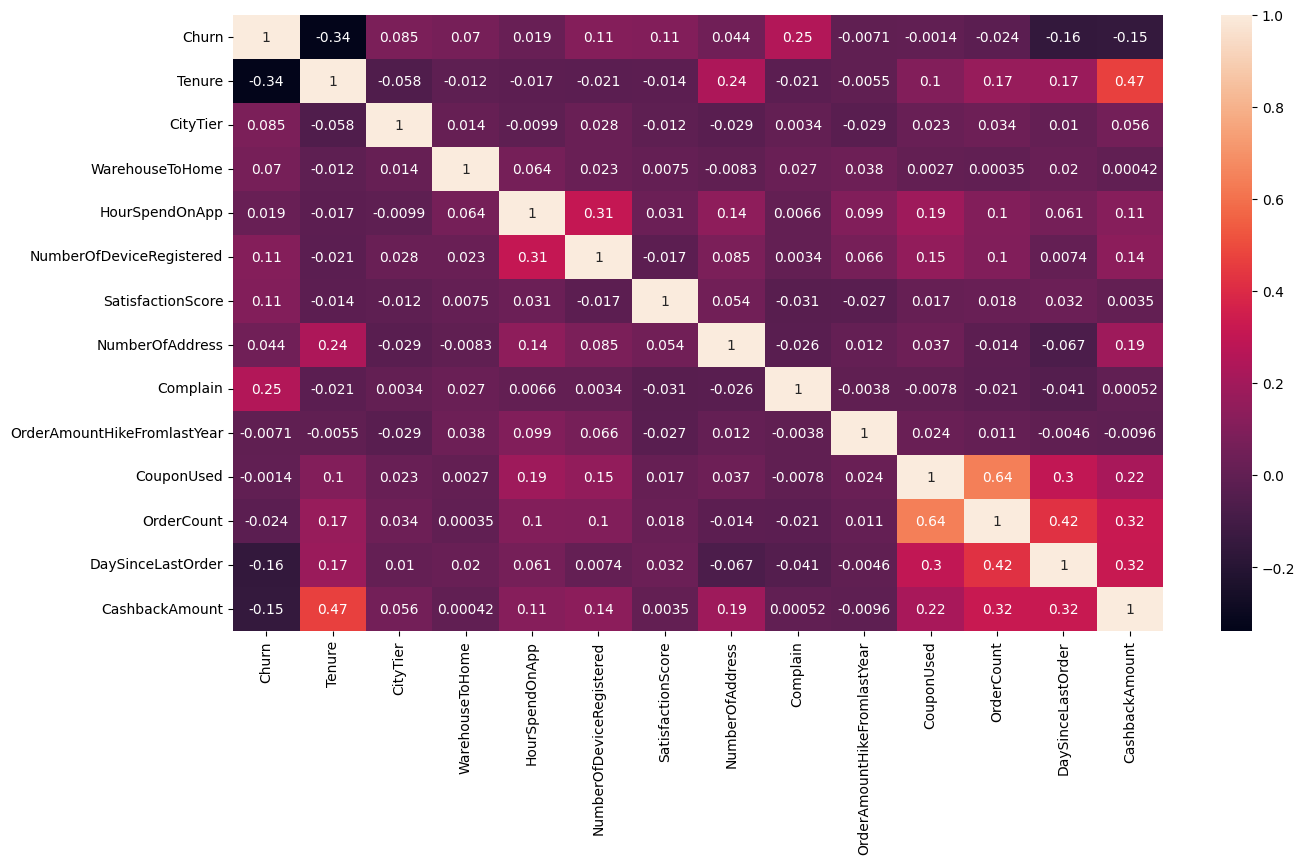

In [53]:
# Plot heatmap to see the correlation between numeric features
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes('number').drop('CustomerID',axis=1).corr(), annot=True)

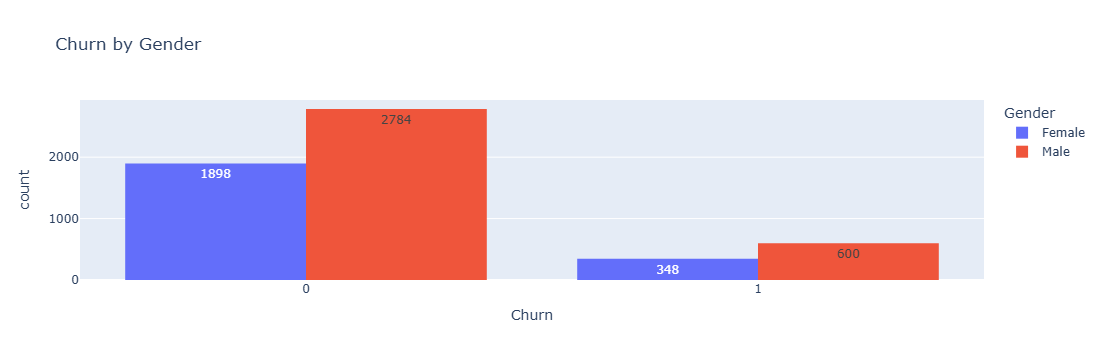

In [54]:
# Plot histogram of Churn by Gender
px.histogram(df, x='Churn', color='Gender', barmode='group', text_auto=True, title='Churn by Gender')

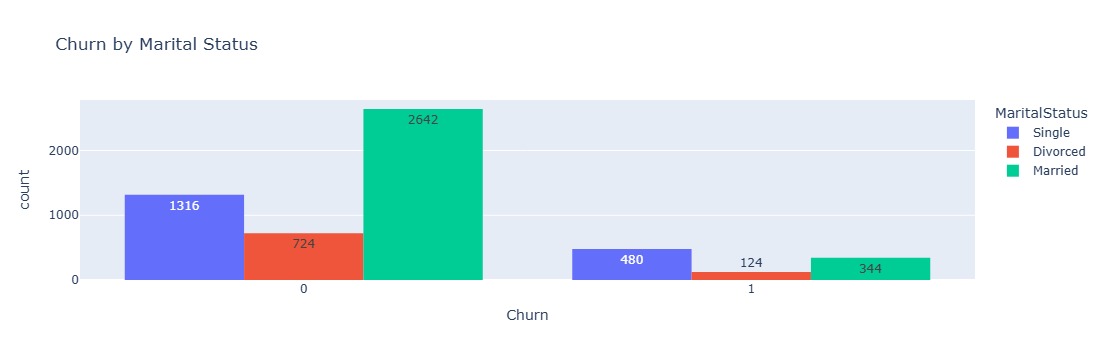

In [56]:
# Plot histogram of Churn by Marital Status
px.histogram(df, x='Churn', color='MaritalStatus', barmode='group', text_auto=True,title="Churn by Marital Status")

In [57]:
# Select categorical columns to convert into numerical values
Categorical_col = df.select_dtypes('object')
Categorical_col.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile,Single
2,Mobile Phone,Debit Card,Male,Mobile,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile,Single


In [58]:
# Conver categorical values into numerical values
Categorical_col_OneHotEncoding = pd.get_dummies(Categorical_col, drop_first=True).astype(int)
Categorical_col_OneHotEncoding.head()

,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,1,0,0,1,0,0,0,1
2,1,0,1,0,0,1,0,0,1,0,0,0,1
3,1,0,1,0,0,1,0,1,0,0,0,0,1
4,1,1,0,0,0,1,0,0,1,0,0,0,1


In [59]:
# Conact the dataframe with the converted categorical values
df = pd.concat([df, Categorical_col_OneHotEncoding], axis=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,...,0,0,1,0,0,1,0,0,0,1


In [60]:
# Drop previous categorical columns
df.drop(columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'], axis=1, inplace=True)

In [63]:
# Split the features into X and y
X = df.drop(columns= ['Churn', 'CustomerID'], axis=1)
y = df['Churn']

In [64]:
# Train and test the features
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = model.predict(X_test)

In [67]:
# Check the test score and  to see if there is overfitting or underfitting
print('test score:', model.score(X_test, y_test))
print('train score:', model.score(X_train, y_train))

test score: 0.9715808170515098
train score: 1.0


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       0.99      0.87      0.93       185

    accuracy                           0.98      1126
   macro avg       0.98      0.93      0.96      1126
weighted avg       0.98      0.98      0.98      1126

